### Support Vector Regression 

In [1]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error

### Reading Datasets

In [2]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### Checking for NULL Values

In [3]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Checking the DataTypes

In [4]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

### Converting Categorical data into Nomial Data

In [5]:
from sklearn.preprocessing import LabelEncoder

Extracurricular_Activitiess = LabelEncoder()

data['Extracurricular Activities'] = Extracurricular_Activitiess.fit_transform(data['Extracurricular Activities'])
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [6]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Checking for Outliers

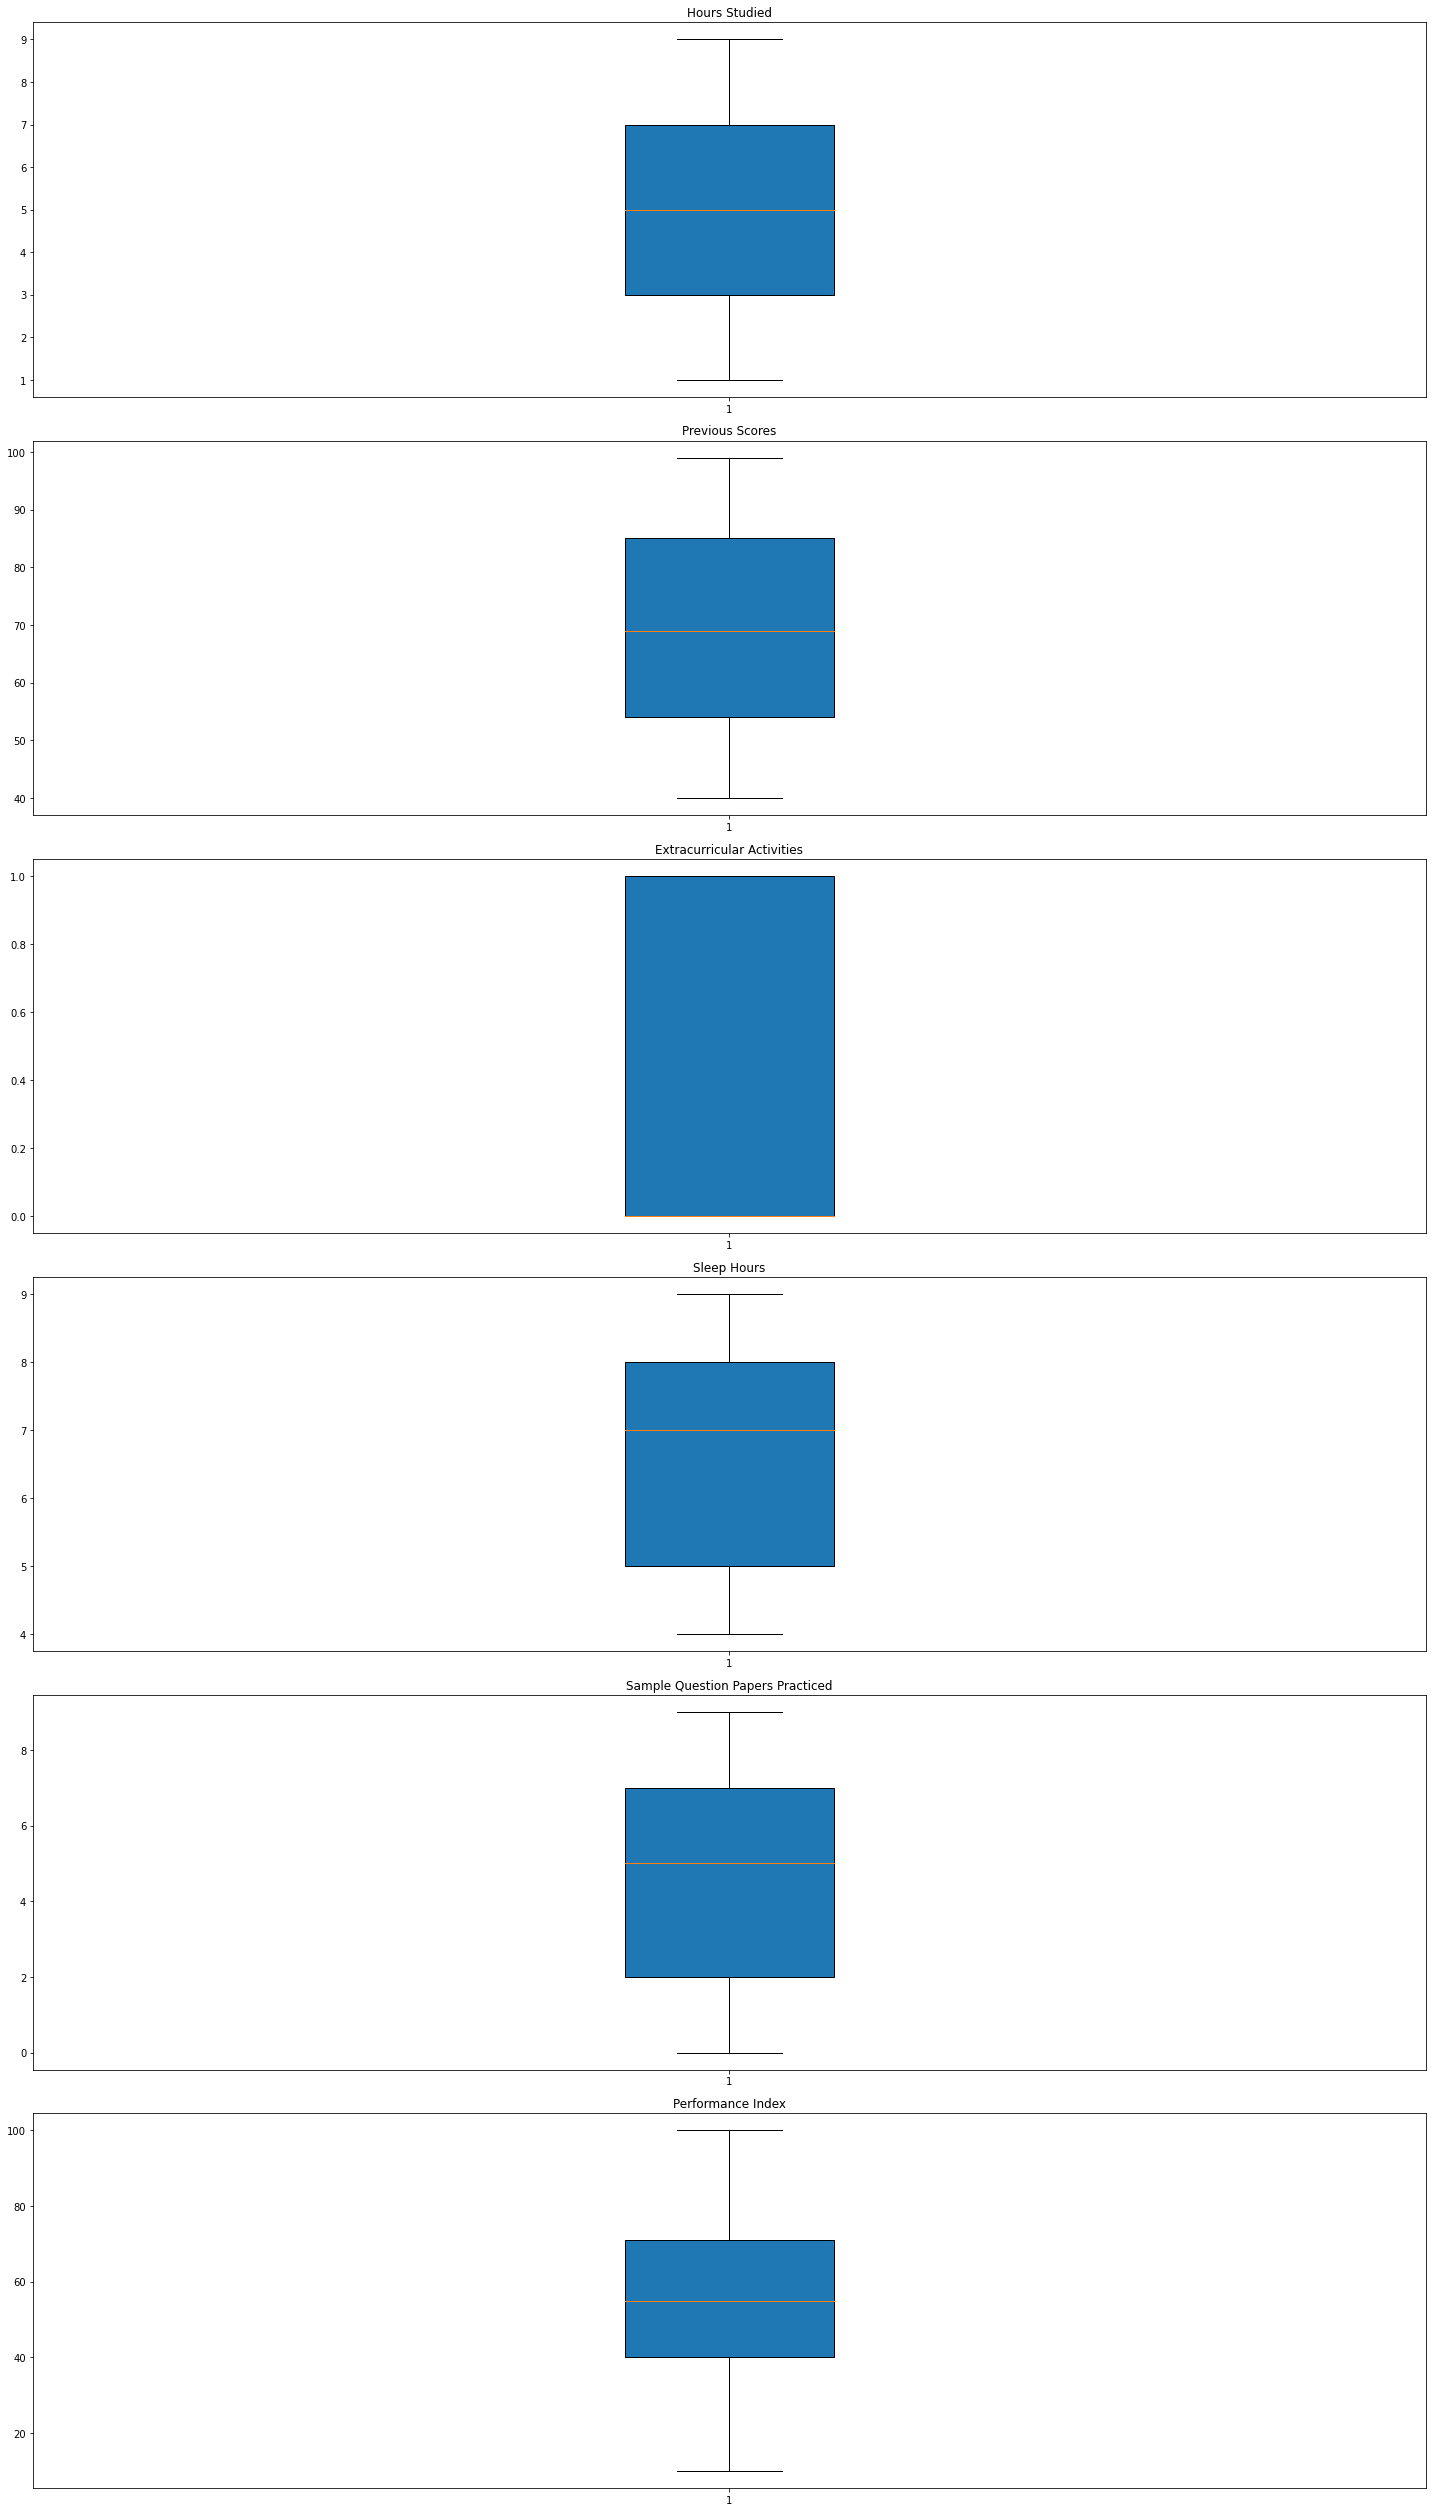

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [7]:
import matplotlib.pyplot as plt

column_names = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


plt.figure(figsize=(20, 35))


for i,col in enumerate(column_names, 1):
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.subplot(6, 1, i) 
    plt.boxplot(data[col], patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()
data

### Spliting into x and y

In [8]:
x=data.drop('Performance Index', axis = 1)

In [9]:
y=data['Performance Index']

### Spliting into Train Test 

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=120)

### Model1

In [11]:
model = SVR()
model.fit(x_train,y_train)
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))


Train Score 0.9853171949527414
Test Score 0.985376006954158


### Model 2

In [12]:
model = SVR(kernel = 'sigmoid')
model.fit(x_train,y_train)
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))




Train Score -61.61935245749422
Test Score -62.9218918752714


### Model 3

In [13]:
model = SVR(kernel = 'linear',C=5,gamma='auto')
model.fit(x_train,y_train)
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))


Train Score 0.9886983482611781
Test Score 0.9889404229504491


### Model 4

In [14]:
model = SVR(kernel = 'linear',C=5)
model.fit(x_train,y_train)
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))


Train Score 0.9886983482611781
Test Score 0.9889404229504491


### Predicting on test data

In [15]:
y_pred = model.predict(x_test)
pd.DataFrame({'True Value' : y_test ,'Predicted Value' : y_pred })

,True Value,Predicted Value
3223,36.0,36.197766
3686,20.0,17.226514
9378,56.0,53.765514
7588,81.0,81.271266
6390,39.0,38.964849
...,...,...
4034,49.0,50.684397
3208,46.0,45.150238
7278,83.0,81.979373
9697,52.0,48.902854


### Calculating error

In [16]:
print("mean_squared_error : " ,mean_squared_error(y_test,y_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test,y_pred))

mean_squared_error :  4.036757556369707
mean_absolute_error :  1.579737141397004


In [ ]:

#ada boost
#gradient boosting
#xgboost